In [1]:
import numpy as np
import matplotlib.pyplot as plt
from func.ultis import decompress_pickle

In [2]:
psnr_list_HMS = decompress_pickle("psnr_list_HMS.pbz2")
psnr_list_Ovules = decompress_pickle("psnr_list_Ovules.pbz2")
psnr_list_LRP = decompress_pickle("psnr_list_LRP.pbz2")

ssim_list_HMS = decompress_pickle("ssim_list_HMS.pbz2")
ssim_list_Ovules = decompress_pickle("ssim_list_Ovules.pbz2")
ssim_list_LRP = decompress_pickle("ssim_list_LRP.pbz2")

value_count_list_HMS = decompress_pickle("value_count_list_HMS.pbz2")
value_count_list_Ovules = decompress_pickle("value_count_list_Ovules.pbz2")
value_count_list_LRP = decompress_pickle("value_count_list_LRP.pbz2")

In [89]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [90]:
from statistics import mean

print(f"avg PSNR HMS: {mean(psnr_list_HMS)}")
print(f"avg PSNR Ovules: {mean(psnr_list_Ovules)}")
print(f"avg PSNR LRP: {mean(psnr_list_LRP)}")

print(f"avg ssim HMS: {mean(ssim_list_HMS)}")
print(f"avg ssim Ovules: {mean(ssim_list_Ovules)}")
print(f"avg ssim LRP: {mean(ssim_list_LRP)}")

avg PSNR HMS: 11.532507930350814
avg PSNR Ovules: 13.832130356005125
avg PSNR LRP: 8.143221328380205
avg ssim HMS: 0.7205789764758038
avg ssim Ovules: 0.6983464460935638
avg ssim LRP: 0.5410191710033025


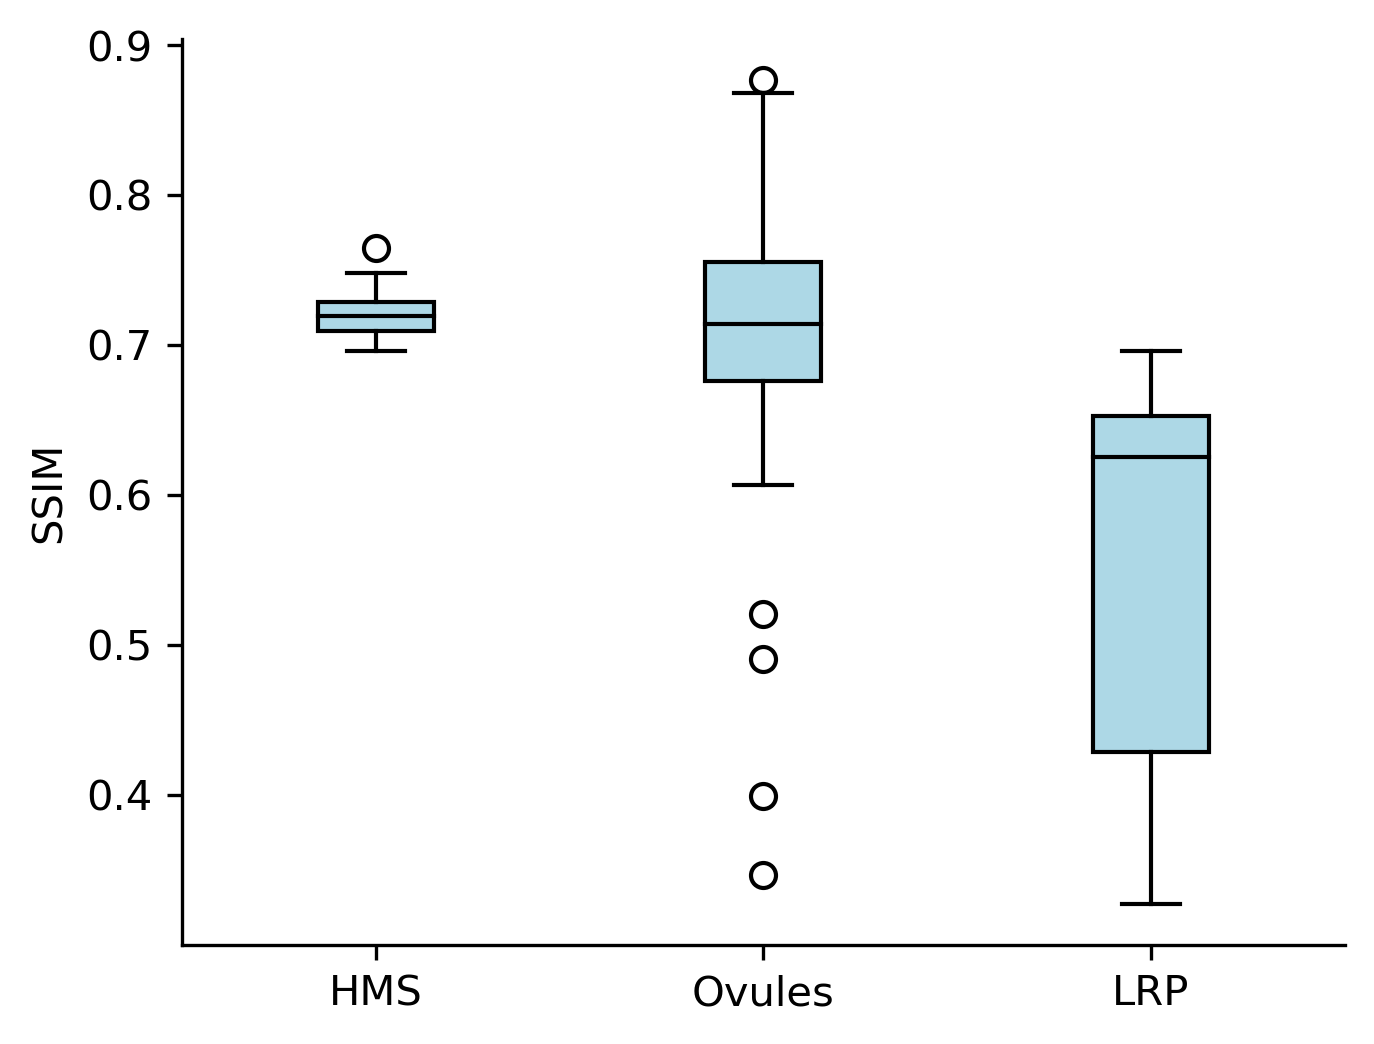

In [242]:
data = [ssim_list_HMS, ssim_list_Ovules, ssim_list_LRP]
fig1, ax1 = plt.subplots()
fig1.set_size_inches(5, 4)
fig1.set_dpi(300)
# ax1.set_title('Multiple Samples with Different sizes')
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.set_ylabel("SSIM")
ax1.boxplot(data, labels=['HMS', 'Ovules', 'LRP'], patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'), medianprops=dict(color='black'))

plt.savefig("ssim_datasets_comparison.pdf", format="pdf", bbox_inches="tight")
plt.show()

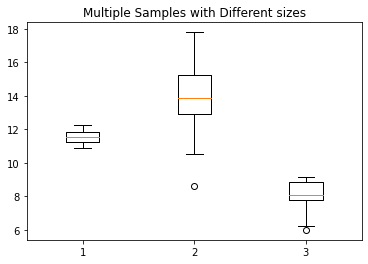

In [87]:
data = [psnr_list_HMS, psnr_list_Ovules, psnr_list_LRP]
fig1, ax1 = plt.subplots()
ax1.set_title('Multiple Samples with Different sizes')
ax1.boxplot(data)

plt.show()

psnr weicht zu sehr von PlantSeg ab... ssim passt


# Characterize Cells


for cell_count_tuple in value_count_list_HMS:
    # print(f"max value: {cell_count_tuple[0][np.argsort(-cell_count_tuple[1])[0]]}")
    # get the largest cell:
    print(f"largest cell: {np.max(cell_count_tuple[1][np.argsort(-cell_count_tuple[1])[1]])}")

    # small weird outlier cells... won't count because of downscaling
    print(f"smallest cell: {np.min(cell_count_tuple[1][np.argsort(cell_count_tuple[1])[50]])}")

In [245]:
cell_sizes_HMS = []
for cell_count_tuple in value_count_list_HMS:
    # biggest "cell" would be background -> remove from cell sizes
    background = np.max(cell_count_tuple[1])
    cell_sizes = cell_count_tuple[1]
    cell_sizes = list(cell_sizes)
    # print(background)
    cell_sizes.remove(background)

    cell_sizes_HMS.extend(cell_sizes)
print("------")
cell_sizes_Ovules = []
for cell_count_tuple in value_count_list_Ovules:
    # biggest "cell" would be background -> remove from cell sizes
    background = np.max(cell_count_tuple[1])
    cell_sizes = cell_count_tuple[1]
    cell_sizes = list(cell_sizes)
    # print(background)
    cell_sizes.remove(background)

    cell_sizes_Ovules.extend(cell_sizes)
print("------")
cell_sizes_LRP = []
for cell_count_tuple in value_count_list_LRP:
    # biggest "cell" would be background -> remove from cell sizes
    background = np.max(cell_count_tuple[1])
    cell_sizes = cell_count_tuple[1]
    cell_sizes = list(cell_sizes)
    # print(background)
    cell_sizes.remove(background)

    cell_sizes_LRP.extend(cell_sizes)

------
------


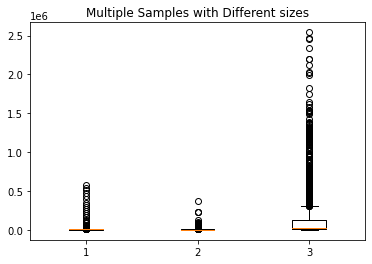

In [251]:
# remove noise
cell_sizes_cleansed_HMS = [x for x in cell_sizes_HMS if x >= 5]

cell_sizes_cleansed_Ovules = [x for x in cell_sizes_Ovules if x >= 5]

cell_sizes_cleansed_LRP = [x for x in cell_sizes_LRP if x >= 5]

data = [cell_sizes_cleansed_HMS, cell_sizes_cleansed_Ovules, cell_sizes_cleansed_LRP]
fig1, ax1 = plt.subplots()
ax1.set_title('Multiple Samples with Different sizes')
ax1.boxplot(data)

plt.show()

In [252]:
# calculate median
from statistics import median

print(f"median cells HMS: {median(cell_sizes_cleansed_HMS)}")
print(f"median cells Ovules: {median(cell_sizes_cleansed_Ovules)}")
print(f"median cells LRP: {median(cell_sizes_cleansed_LRP)}")

print(f"median cells HMS: {median(cell_sizes_HMS)}")
print(f"median cells Ovules: {median(cell_sizes_Ovules)}")
print(f"median cells LRP: {median(cell_sizes_LRP)}")


median cells HMS: 6096
median cells Ovules: 3925
median cells LRP: 23181.0
median cells HMS: 5634
median cells Ovules: 3901.0
median cells LRP: 16912


(array([1.2242e+04, 6.0000e+00, 5.0000e+00, 2.0000e+00, 4.0000e+00]),
 array([1.000000e+01, 1.165786e+05, 2.331472e+05, 3.497158e+05,
        4.662844e+05, 5.828530e+05]),
 <BarContainer object of 5 artists>)

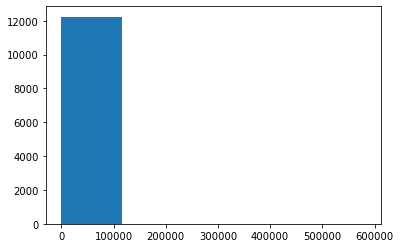

In [61]:
plt.hist(cell_sizes_cleansed_HMS, bins=5)

In [66]:
mean(cell_sizes_cleansed_HMS)
np.max(cell_sizes_cleansed_HMS)

582853

{'whiskers': [<matplotlib.lines.Line2D at 0x7fca91213850>,
 'caps': [<matplotlib.lines.Line2D at 0x7fca91213220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fca911fe1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fca911fce20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fca911fce50>],
 'means': []}

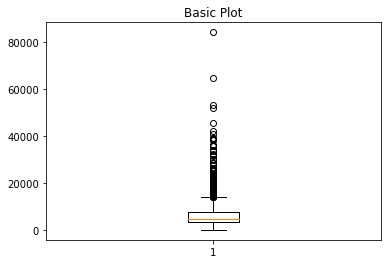

In [93]:

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(np.array(cell_sizes_Ovules[0]))

In [54]:
np.sort(cell_sizes_HMS)

array([      2,       2,       2, ..., 7509201, 7607889, 7702494])

In [73]:
print(f"mean HMS: {mean(cell_sizes_cleansed_HMS)}")
print(f"std HMS: {np.std(np.array(cell_sizes_cleansed_HMS))}")

print(f"mean Ovules: {mean(cell_sizes_cleansed_Ovules)}")
print(f"std Ovules: {np.std(cell_sizes_cleansed_Ovules)}")

print(f"mean LRP: {mean(cell_sizes_cleansed_LRP)}")
print(f"std LRP: {np.std(cell_sizes_cleansed_LRP)}")

mean HMS: 6825
std HMS: 13226.695279107216
mean Ovules: 5304
std Ovules: 6007.7313105461735
mean LRP: 147527
std LRP: 287080.7963365866


(array([120., 185., 309., 172., 109.,  50.,  38.,  29.,  25.,  16.,  13.,
         11.,  15.,   8.,   4.,   7.,   3.,   3.,   2.,   2.,   2.,   4.,
          3.,   2.,   1.,   1.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([2.000000e+00, 1.687720e+03, 3.373440e+03, 5.059160e+03,
        6.744880e+03, 8.430600e+03, 1.011632e+04, 1.180204e+04,
        1.348776e+04, 1.517348e+04, 1.685920e+04, 1.854492e+04,
        2.023064e+04, 2.191636e+04, 2.360208e+04, 2.528780e+04,
        2.697352e+04, 2.865924e+04, 3.034496e+04, 3.203068e+04,
        3.371640e+04, 3.540212e+04, 3.708784e+04, 3.877356e+04,
        4.045928e+04, 4.214500e+04, 4.383072e+04, 4.551644e+04,
        4.720216e+04, 4.888788e+04, 5.057360e+04, 5.225932e+04,
        5.394504e+04, 5.563076e+04, 5.731648e+04, 5.900220e+04,
        6.068792e+04, 6.237364e+04, 6.405936e+04, 6.574508e+04,
        6.743080e+

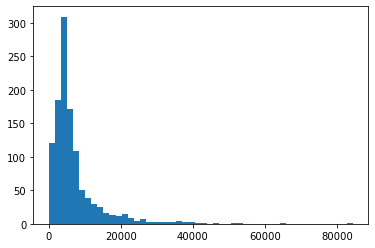

In [98]:
plt.hist(cell_sizes_Ovules[0], bins=50)

(array([ 95.,  19., 108., 115.,  49.,  32.,   9.,   2.,   2.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([2.000000e+00, 1.896120e+03, 3.790240e+03, 5.684360e+03,
        7.578480e+03, 9.472600e+03, 1.136672e+04, 1.326084e+04,
        1.515496e+04, 1.704908e+04, 1.894320e+04, 2.083732e+04,
        2.273144e+04, 2.462556e+04, 2.651968e+04, 2.841380e+04,
        3.030792e+04, 3.220204e+04, 3.409616e+04, 3.599028e+04,
        3.788440e+04, 3.977852e+04, 4.167264e+04, 4.356676e+04,
        4.546088e+04, 4.735500e+04, 4.924912e+04, 5.114324e+04,
        5.303736e+04, 5.493148e+04, 5.682560e+04, 5.871972e+04,
        6.061384e+04, 6.250796e+04, 6.440208e+04, 6.629620e+04,
        6.819032e+04, 7.008444e+04, 7.197856e+04, 7.387268e+04,
        7.576680e+

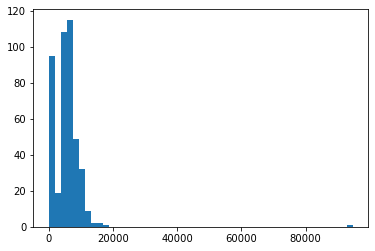

In [99]:
plt.hist(cell_sizes_HMS[0], bins=50)

(array([25., 14.,  5.,  9.,  2.,  4.,  4.,  4.,  3.,  0.,  1.,  1.,  0.,
         1.,  1.,  3.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([4.0000000e+00, 4.4051700e+04, 8.8099400e+04, 1.3214710e+05,
        1.7619480e+05, 2.2024250e+05, 2.6429020e+05, 3.0833790e+05,
        3.5238560e+05, 3.9643330e+05, 4.4048100e+05, 4.8452870e+05,
        5.2857640e+05, 5.7262410e+05, 6.1667180e+05, 6.6071950e+05,
        7.0476720e+05, 7.4881490e+05, 7.9286260e+05, 8.3691030e+05,
        8.8095800e+05, 9.2500570e+05, 9.6905340e+05, 1.0131011e+06,
        1.0571488e+06, 1.1011965e+06, 1.1452442e+06, 1.1892919e+06,
        1.2333396e+06, 1.2773873e+06, 1.3214350e+06, 1.3654827e+06,
        1.4095304e+06, 1.4535781e+06, 1.4976258e+06, 1.5416735e+06,
        1.5857212e+06, 1.6297689e+06, 1.6738166e+06, 1.7178643e+06,
        1.7619120e+06, 1.8059597e+06

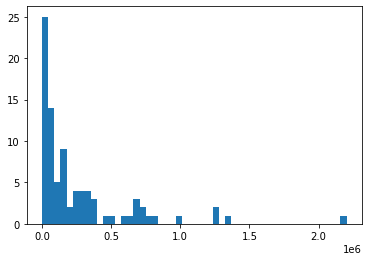

In [100]:
plt.hist(cell_sizes_LRP[0], bins=50)

In [82]:
min(cell_sizes_cleansed_Ovules)

100

# average cell count per image


In [102]:
number_cells_list_HMS = []
number_cells_list_Ovules = []
number_cells_list_LRP = []

for val_tuple in value_count_list_HMS:
    number_cells_list_HMS.append(len(val_tuple[0]))

for val_tuple in value_count_list_Ovules:
    number_cells_list_Ovules.append(len(val_tuple[0]))

for val_tuple in value_count_list_LRP:
    number_cells_list_LRP.append(len(val_tuple[0]))

In [103]:
print(f"mean number of cells per image HMS: {mean(number_cells_list_HMS)}")
print(f"mean number of cells per image Ovules: {mean(number_cells_list_Ovules)}")
print(f"mean number of cells per image LRP: {mean(number_cells_list_LRP)}")

mean number of cells per image HMS: 406.0833333333333
mean number of cells per image Ovules: 1209.1290322580646
mean number of cells per image LRP: 136.82142857142858


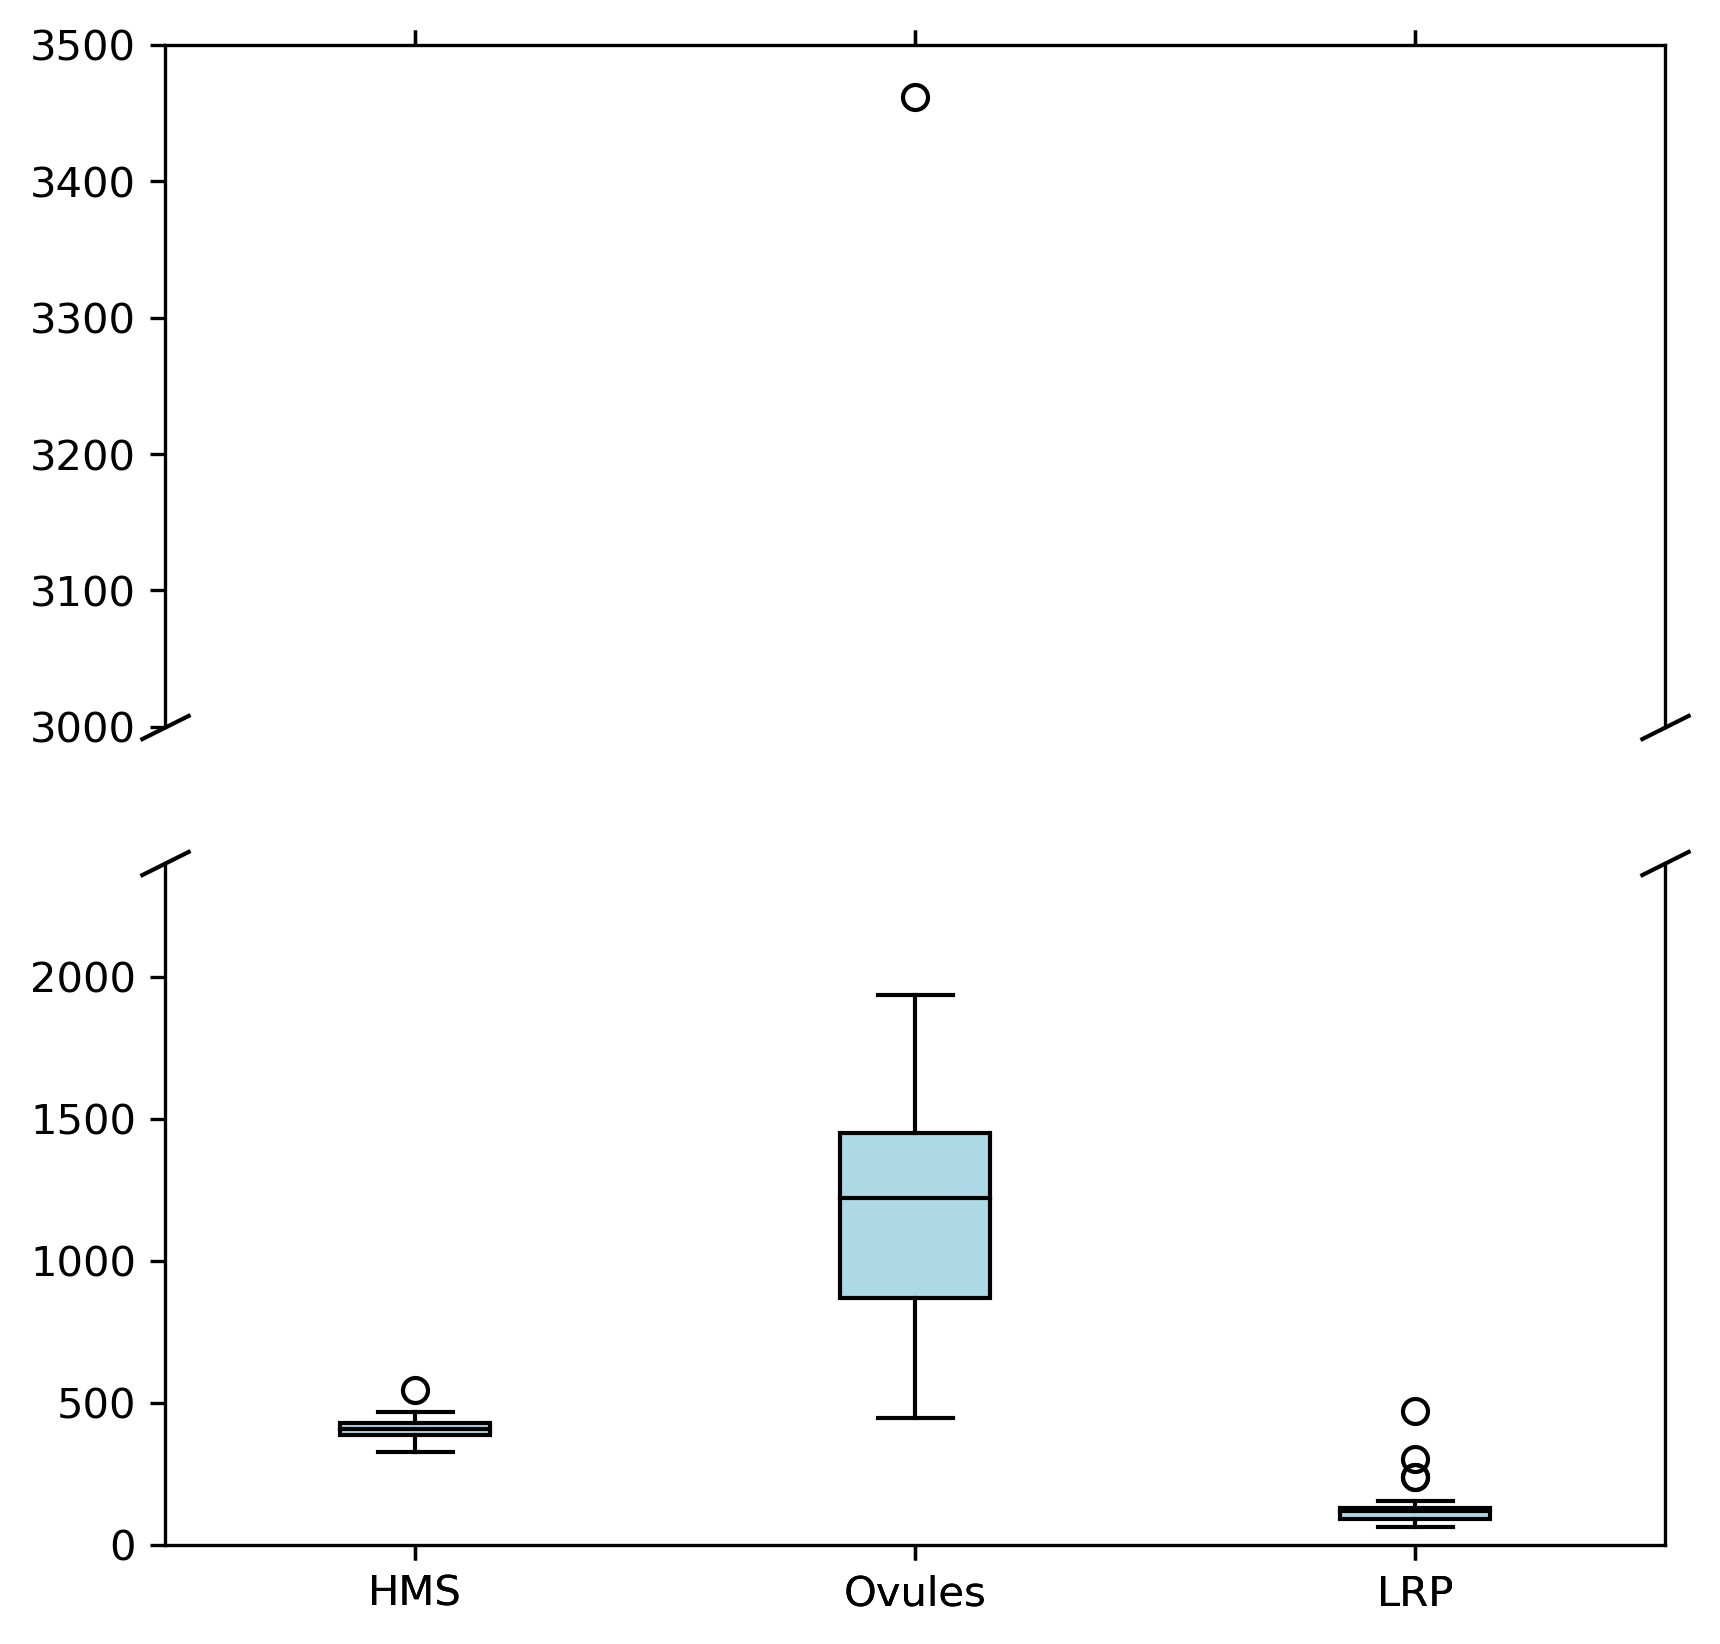

In [206]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)


data = [number_cells_list_HMS, number_cells_list_Ovules, number_cells_list_LRP]
fig1, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

d = .015  # how big to make the diagonal lines in axes coordinates
ax1.set_ylim(3000, 3500)  # outliers only
ax2.set_ylim(0, 2400)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)

ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax1.tick_params(labelbottom=False)

fig1.set_size_inches(5, 5)
fig1.set_dpi(300)

kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)

d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.boxplot(data, labels=['HMS', 'Ovules', 'LRP'], patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'), medianprops=dict(color='black'))
ax2.boxplot(data, labels=['HMS', 'Ovules', 'LRP'], patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'), medianprops=dict(color='black'))

set_size(5,1, ax=ax1)
set_size(5,5, ax=ax2)

plt.show()

In [188]:
from brokenaxes import brokenaxes

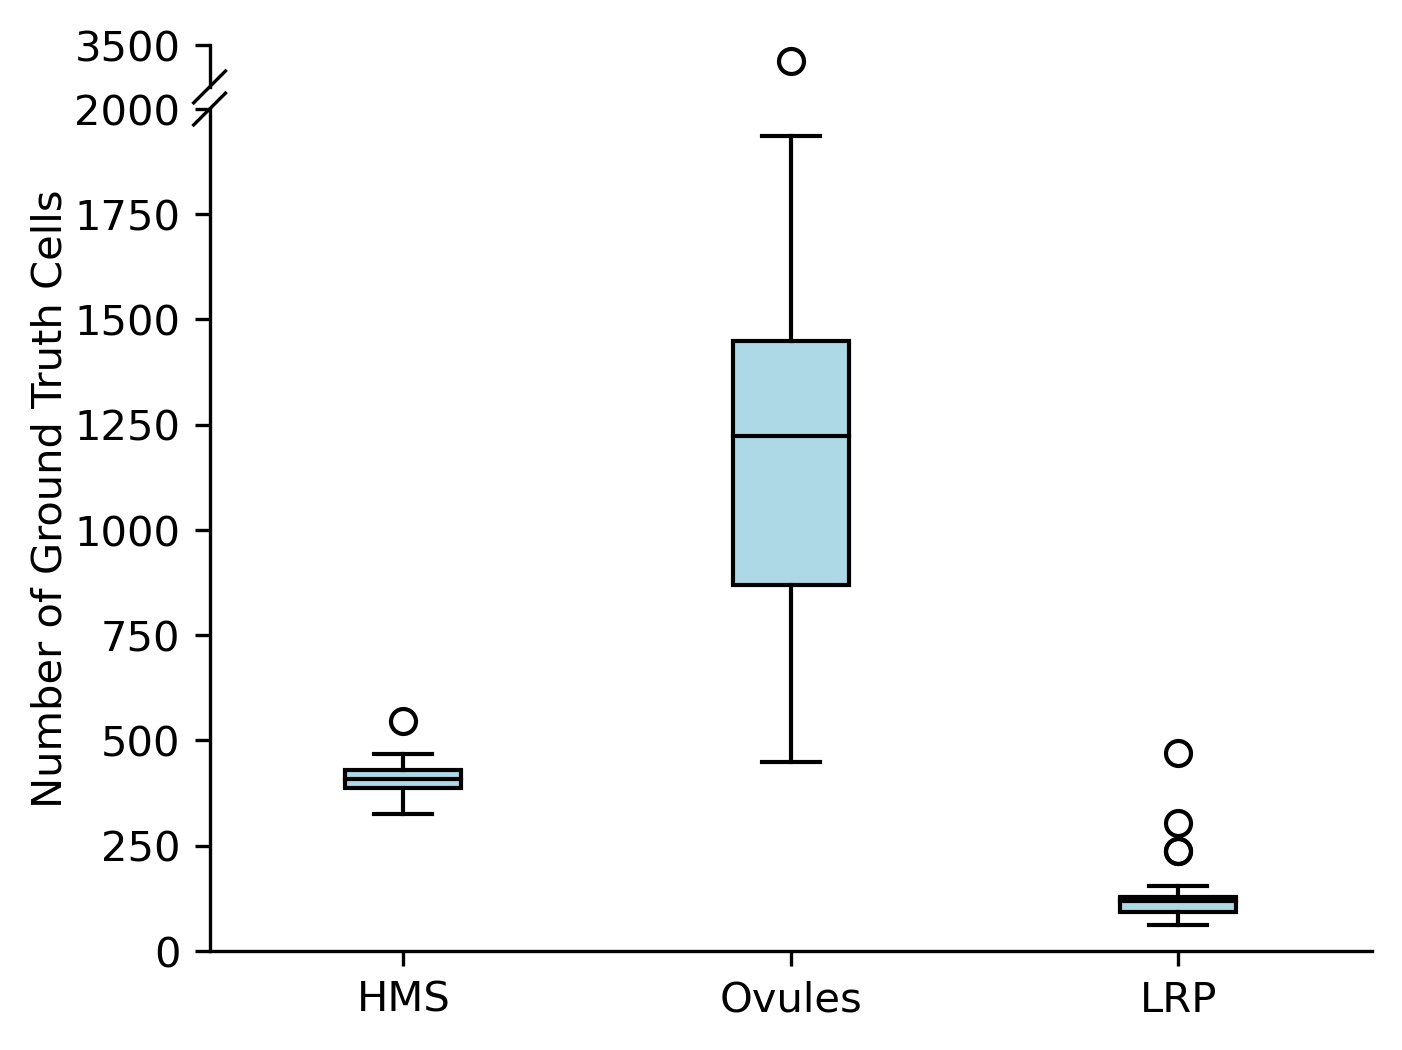

In [243]:
data = [number_cells_list_HMS, number_cells_list_Ovules, number_cells_list_LRP]
fig1 = plt.figure(figsize=(5,4), dpi=300)
bax = brokenaxes(ylims=((0, 2000), (3400, 3500)), hspace=.05)


# bax.axs[-1].set_xticklabels(['HMS', 'Ovules', 'LRP'])
bax.set_ylabel("Number of Ground Truth Cells")

bax.boxplot(data, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'), medianprops=dict(color='black'))
#bax.set_xticks([0,1,2,3],["", "HMS", "Ovules", "LRP"])
bax.axs[-1].set_xticks([1,2,3], ['HMS', 'Ovules', 'LRP'])

plt.savefig("cellcount_datasets_comparison.pdf", format="pdf", bbox_inches="tight")
plt.show()

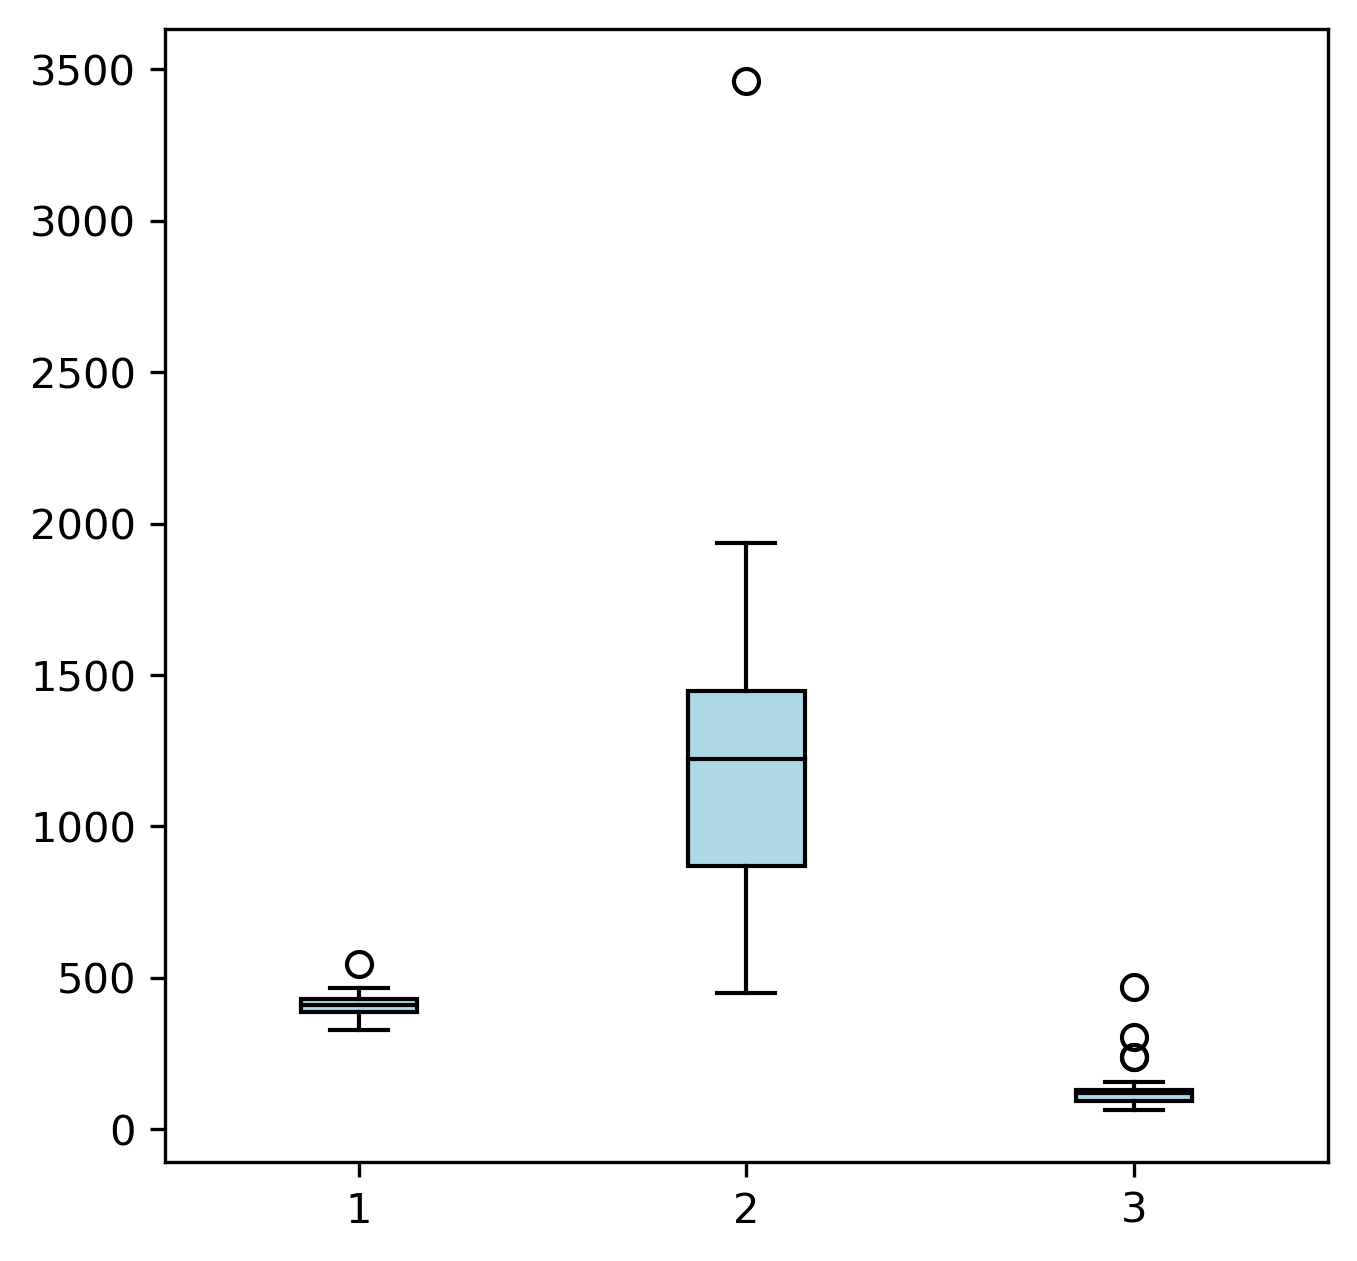

In [208]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(5, 5)
fig1.set_dpi(300)

data = [number_cells_list_HMS, number_cells_list_Ovules, number_cells_list_LRP]



ax1.boxplot(data, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'), medianprops=dict(color='black'))
plt.show()

# average background percentage

In [118]:
background_foreground_list_HMS = []
for cell_count_tuple in value_count_list_HMS:
    # biggest "cell" would be background -> remove from cell sizes
    background = np.max(cell_count_tuple[1])
    cell_sizes = cell_count_tuple[1]
    cell_sizes = list(cell_sizes)
    # print(background)
    cell_sizes.remove(background)

    background_foreground_list_HMS.append((background, sum(cell_sizes) + background))

background_foreground_list_Ovules = []
for cell_count_tuple in value_count_list_Ovules:
    # biggest "cell" would be background -> remove from cell sizes
    background = np.max(cell_count_tuple[1])
    cell_sizes = cell_count_tuple[1]
    cell_sizes = list(cell_sizes)
    # print(background)
    cell_sizes.remove(background)

    background_foreground_list_Ovules.append((background, sum(cell_sizes) + background))

background_foreground_list_LRP = []
for cell_count_tuple in value_count_list_LRP:
    # biggest "cell" would be background -> remove from cell sizes
    background = np.max(cell_count_tuple[1])
    cell_sizes = cell_count_tuple[1]
    cell_sizes = list(cell_sizes)
    # print(background)
    cell_sizes.remove(background)

    background_foreground_list_LRP.append((background, sum(cell_sizes) + background))

In [119]:
# calculate background percentage

cell_percentage_list_HMS = []
for bf_tuple in background_foreground_list_HMS:
    cell_percentage_list_HMS.append(bf_tuple[0]/bf_tuple[1])

cell_percentage_list_Ovules = []
for bf_tuple in background_foreground_list_Ovules:
    cell_percentage_list_Ovules.append(bf_tuple[0]/bf_tuple[1])

cell_percentage_list_LRP = []
for bf_tuple in background_foreground_list_LRP:
    cell_percentage_list_LRP.append(bf_tuple[0]/bf_tuple[1])

In [123]:
print(f"mean background percentage per image HMS: {mean(cell_percentage_list_HMS)}")
print(f"mean background percentage per image Ovules: {mean(cell_percentage_list_Ovules)}")
print(f"mean background percentage per image LRP: {mean(cell_percentage_list_LRP)}")

print(f"max background percentage per image HMS: {max(cell_percentage_list_HMS)}")
print(f"max background percentage per image Ovules: {max(cell_percentage_list_Ovules)}")
print(f"max background percentage per image LRP: {max(cell_percentage_list_LRP)}")

mean background percentage per image HMS: 0.7575105590653914
mean background percentage per image Ovules: 0.806433934449208
mean background percentage per image LRP: 0.4806253118953325
max background percentage per image HMS: 0.8035350353023651
max background percentage per image Ovules: 0.9325272929853946
max background percentage per image LRP: 0.6627956444444445


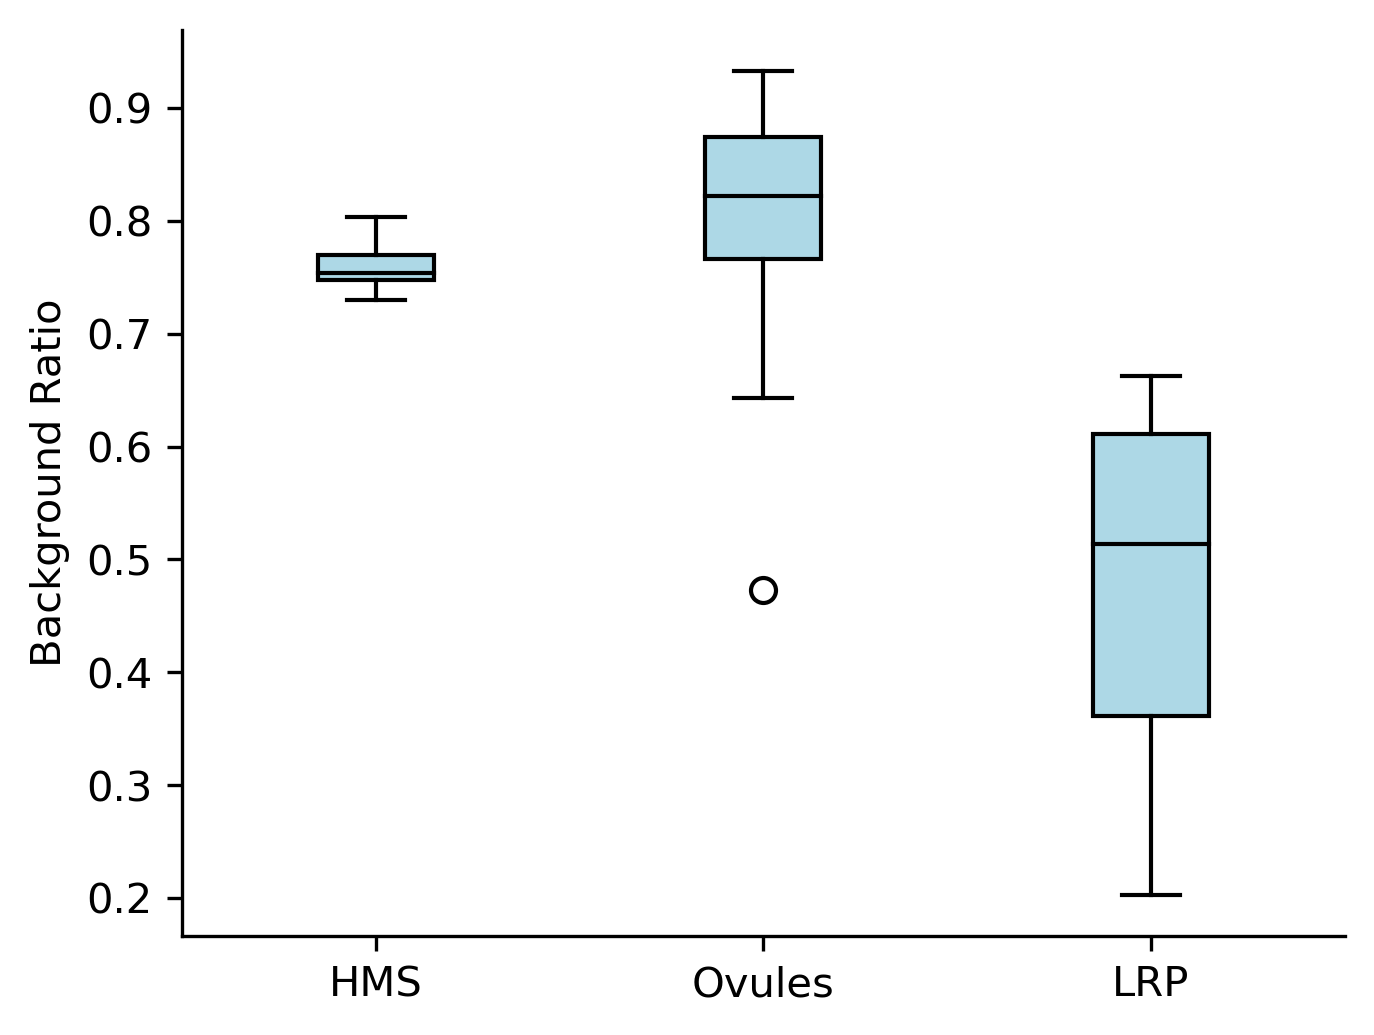

In [244]:
data = [cell_percentage_list_HMS, cell_percentage_list_Ovules, cell_percentage_list_LRP]
fig1, ax1 = plt.subplots()
fig1.set_size_inches(5, 4)
fig1.set_dpi(300)
# ax1.set_title('Multiple Samples with Different sizes')
ax1.set_ylabel("Background Ratio")
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
bplot_1 = ax1.boxplot(data, labels=['HMS', 'Ovules', 'LRP'], patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'), medianprops=dict(color='black'))

plt.savefig("background_ratio_datasets_comparison.pdf", format="pdf", bbox_inches="tight")
plt.show()